## Import statements

In [3]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import os
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# module for fixing imported modules
from importlib import reload

#my modules
from src.env import user, password, CodeUp_sql_server
from src.time_series_acquire import wrangle_store_data as wrangle
import src.time_series_acquire as ac

Notice that we still have the same issue we ran into before. If we want to use this method and we don't want to split in the middle of a day, we will need to either algorithmically or manually tweak the split points.

# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<div class="alert alert-block alert-info">
    <h2> 1. Convert date column to datetime format. </h2>
</div>

In [17]:
def set_index(df, index_variable):
    try:
        df[index_variable] = pd.to_datetime(df[index_variable])
    except ValueError as e:
        print('ValueError', e)
    df = df.set_index(index_variable).sort_index() 
    
    return df

In [66]:
df = wrangle()

<div class="alert alert-block alert-info">
    <h2> 2. Plot the distribution of sale_amount and item_price. </h2>
</div>

<Figure size 500x500 with 0 Axes>

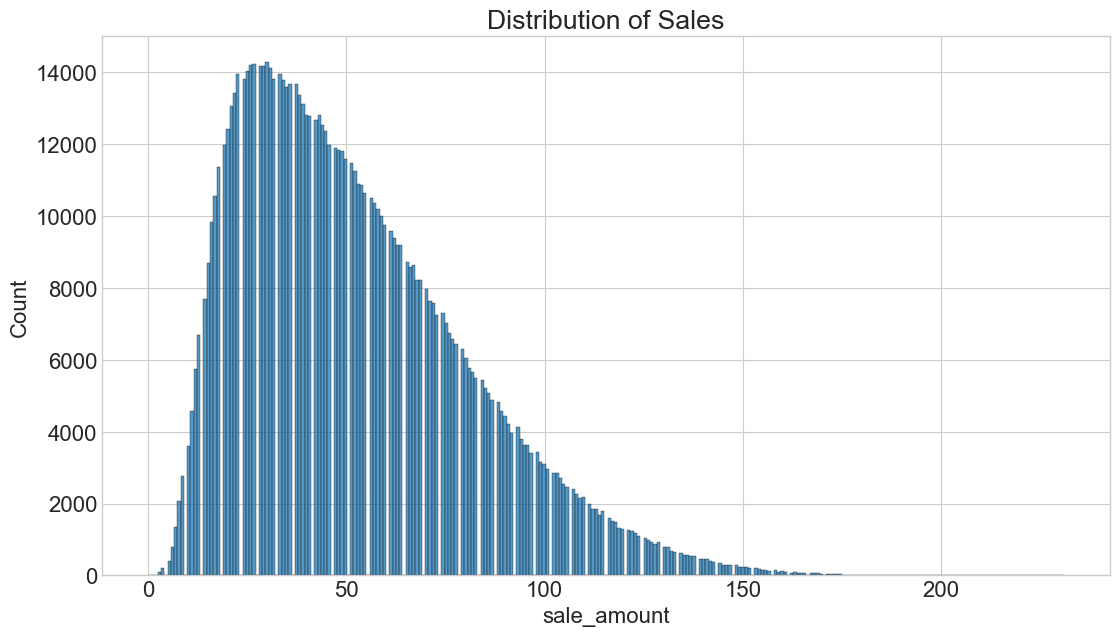

<Figure size 500x500 with 0 Axes>

In [78]:
sns.histplot(data=df, x= 'sale_amount')
plt.title('Distribution of Sales')
plt.figure(figsize = (5,5))

Text(0.5, 1.0, 'Distribution of Item Prices')

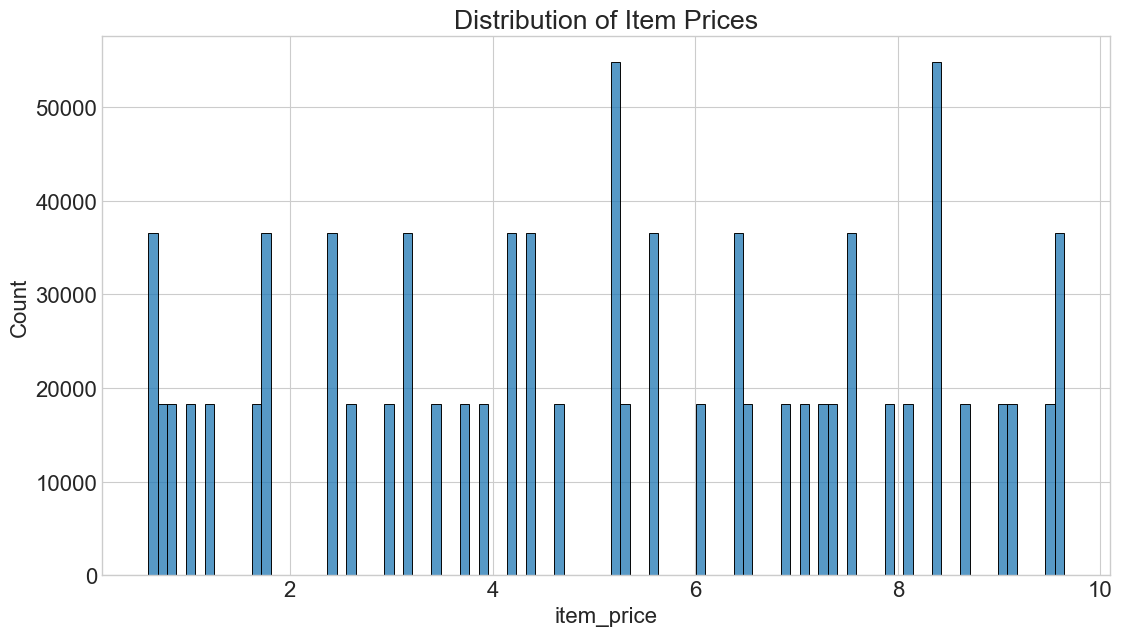

In [76]:
sns.histplot(data=df, x='item_price')
plt.title(f'Distribution of Item Prices')

<div class="alert alert-block alert-info">
    <h2> 3. Set the index to be the datetime variable.</h3>
</div>

In [57]:
df = set_index(df, 'sale_date')

<div class="alert alert-block alert-info">
    <h2> 4. Add a 'month' and 'day of week' column to your dataframe.</h2>
    </div>

In [71]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [72]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday


<div class="alert alert-block alert-info">
    <h2> 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.</h2>
    </div>

In [79]:
#last_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.max()

df['sales_total'] = df.sale_amount * df.item_price
df.head(2)

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16


<div class="alert alert-block alert-info">
    <h2> 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.</h2>

In [6]:
def set_index(df, index_variable):
    try:
        df[index_variable] = pd.to_datetime(df[index_variable])
    except ValueError as e:
        print('ValueError', e)
    df = df.set_index(index_variable).sort_index() 
    
    return df

In [7]:
def prep_store_data():
    df = set_index(wrangle(), 'sale_date')
    df['month'] = df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [8]:
test = prep_store_data()
test.head(2)

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16


In [9]:
reload(ac)

<module 'src.time_series_acquire' from '/Users/CryanRedrose/codeup-data-science/CodeUp/time-series-exercises/src/time_series_acquire.py'>

In [10]:
test1 = ac.get_store_df()
test1.head(2)

,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday,30.16


## German Power

**Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):**
- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

<div class='alert alert-block alert-info'>
    <h2> 1. Acquire the Open Power Systems Data for Germany </h2>
    <h2> 2. Convert date column to datetime format. </h2>
    <h2> 4. Set the index to be the datetime variable. </h2>
</div>

gp = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [106]:
reload(ac)

<module 'src.time_series_acquire' from '/Users/CryanRedrose/codeup-data-science/CodeUp/time-series-exercises/src/time_series_acquire.py'>

In [14]:
gp = ac.get_german_power()
gp.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


<div class='alert alert-block alert-info'>
<h2> 3. Plot the distribution of each of your variables.</h2>
</div>

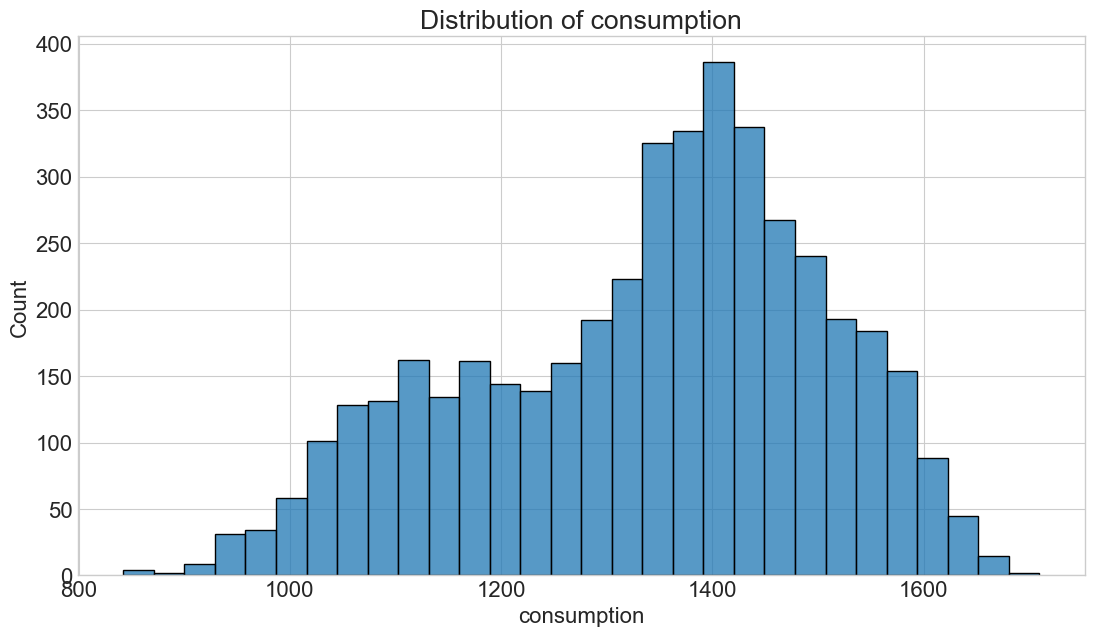

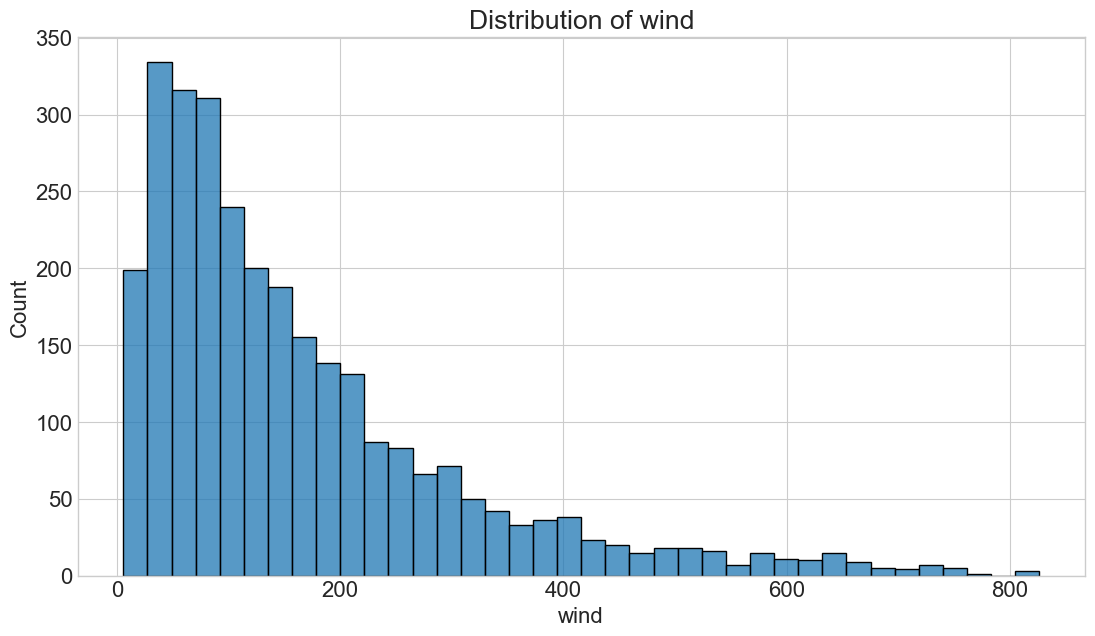

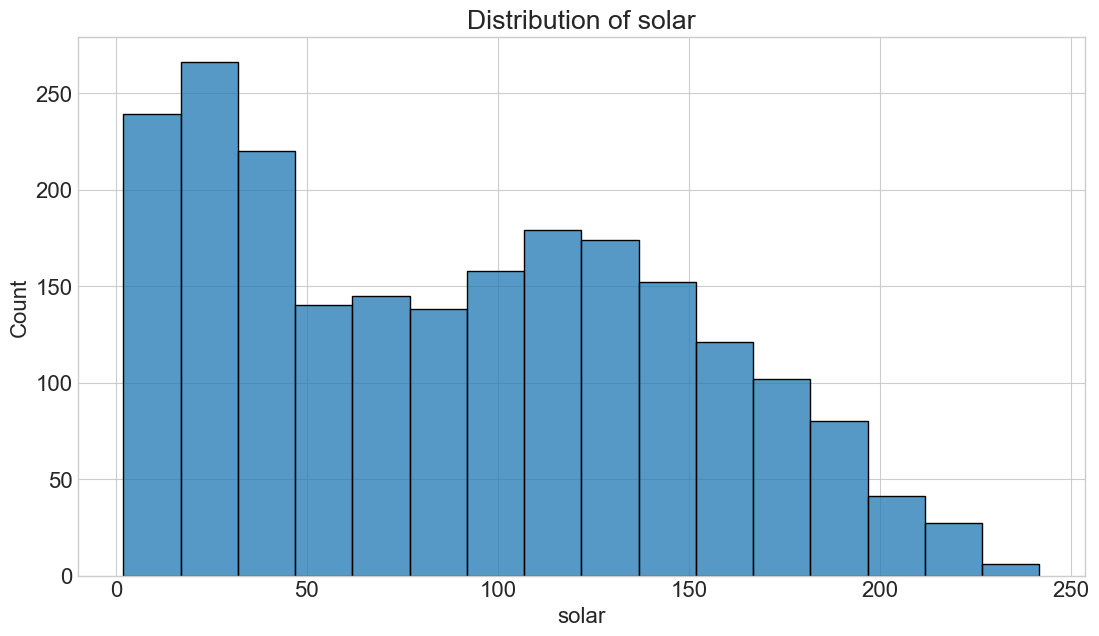

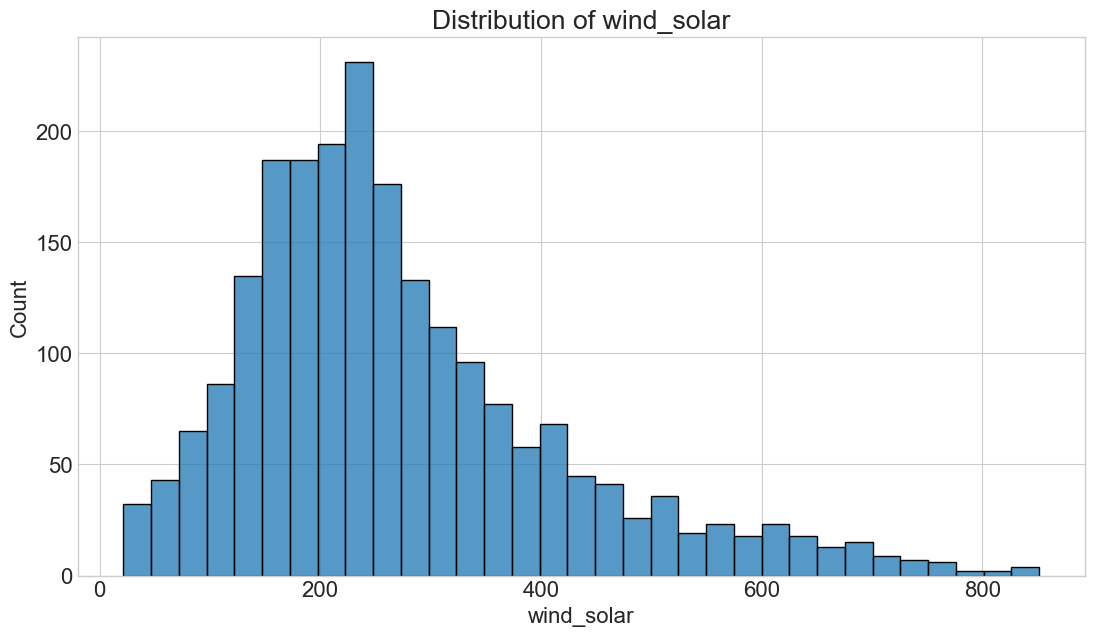

In [15]:
for col in list(gp.columns):
    plt.figure()
    sns.histplot(gp[col])
    plt.title(f'Distribution of {col}')

<div class='alert alert-block alert-info'>
<h2> 5. Add a month and a year column to your dataframe.</h2>
</div>

In [16]:
gp['month'] = gp.index.strftime('%B')
gp['year'] = gp.index.strftime('%Y')
gp.head(2)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006


<div class='alert alert-block alert-info'>
<h2> 6. Fill any missing values.</h2>
</div>

In [17]:
gp.isna().sum()

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [18]:
gp.fillna(0, inplace=True)
gp.head(2)

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006


<div class='alert alert-block alert-info'>
<h2> 7. Fill any missing values.</h2>
</div>

In [21]:
def plot_distributions(df):
    for col in list(df.columns):
        plt.figure()
        sns.histplot(df[col])
        plt.title('Distribution of {}'.format(col))

In [27]:
reload(ac)

<module 'src.time_series_acquire' from '/Users/CryanRedrose/codeup-data-science/CodeUp/time-series-exercises/src/time_series_acquire.py'>

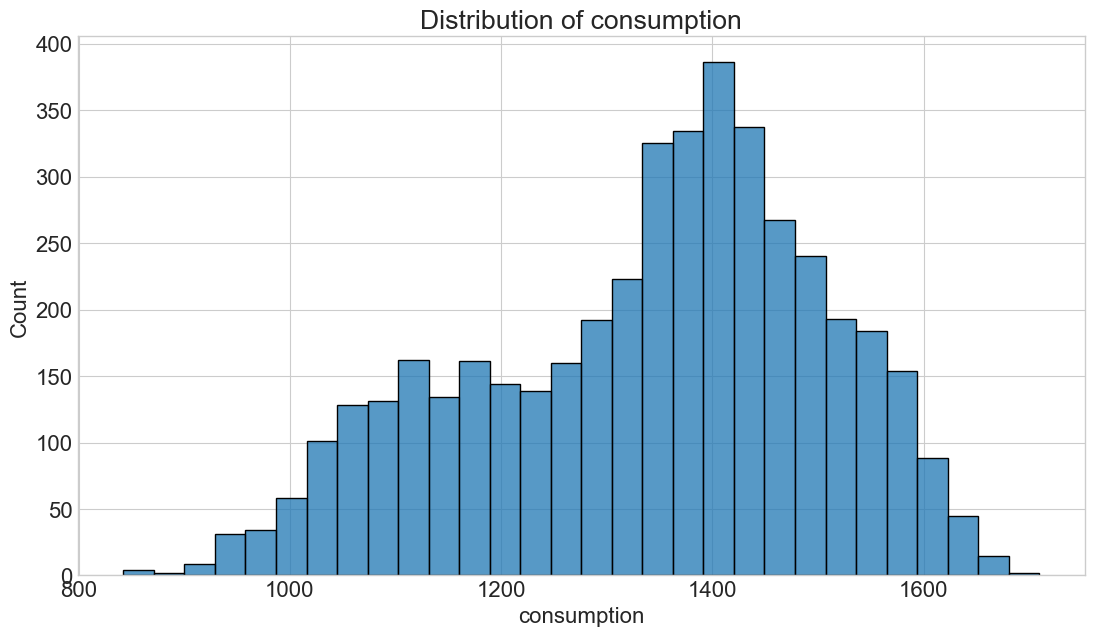

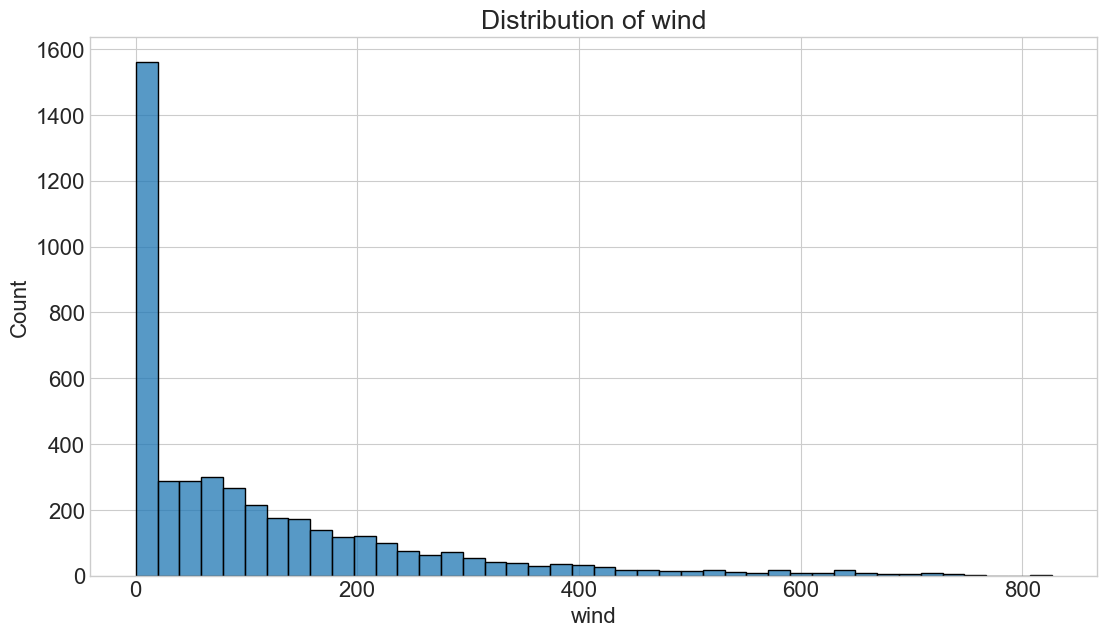

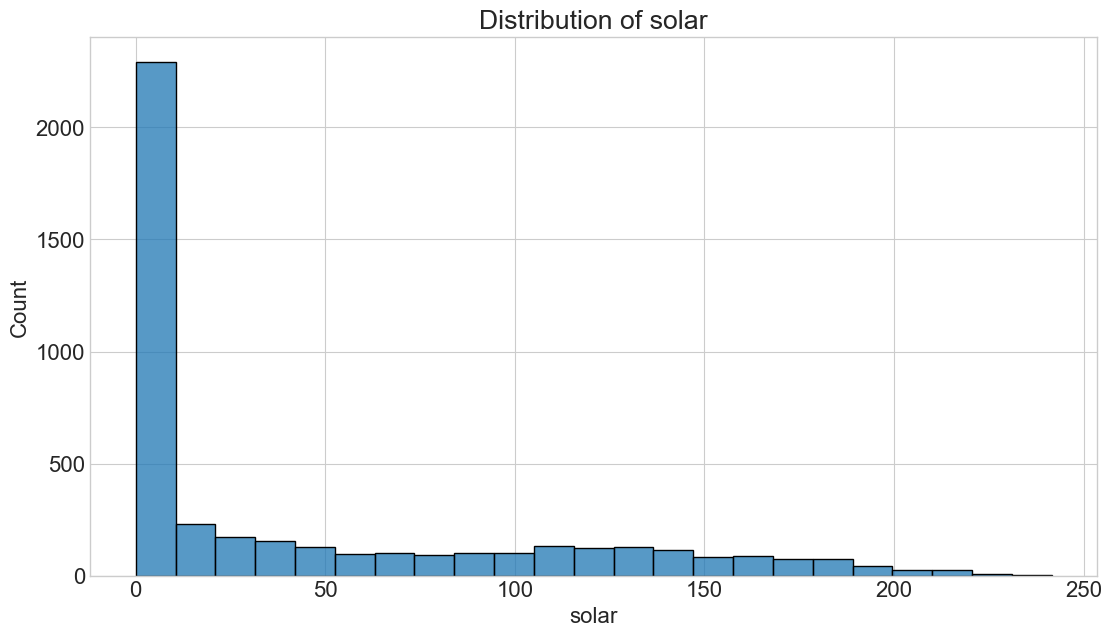

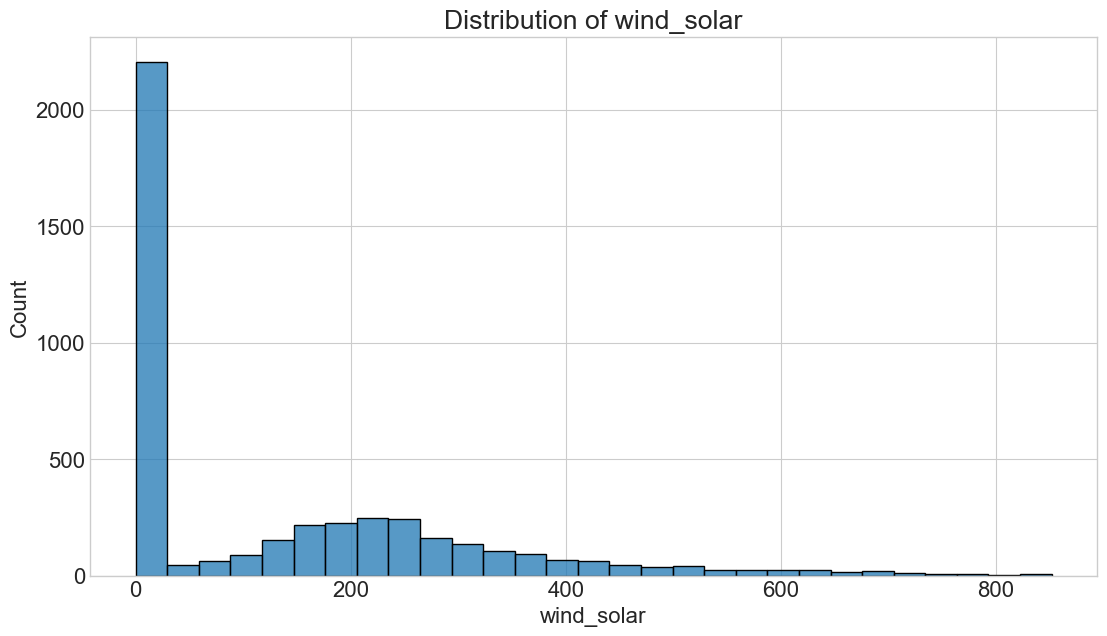

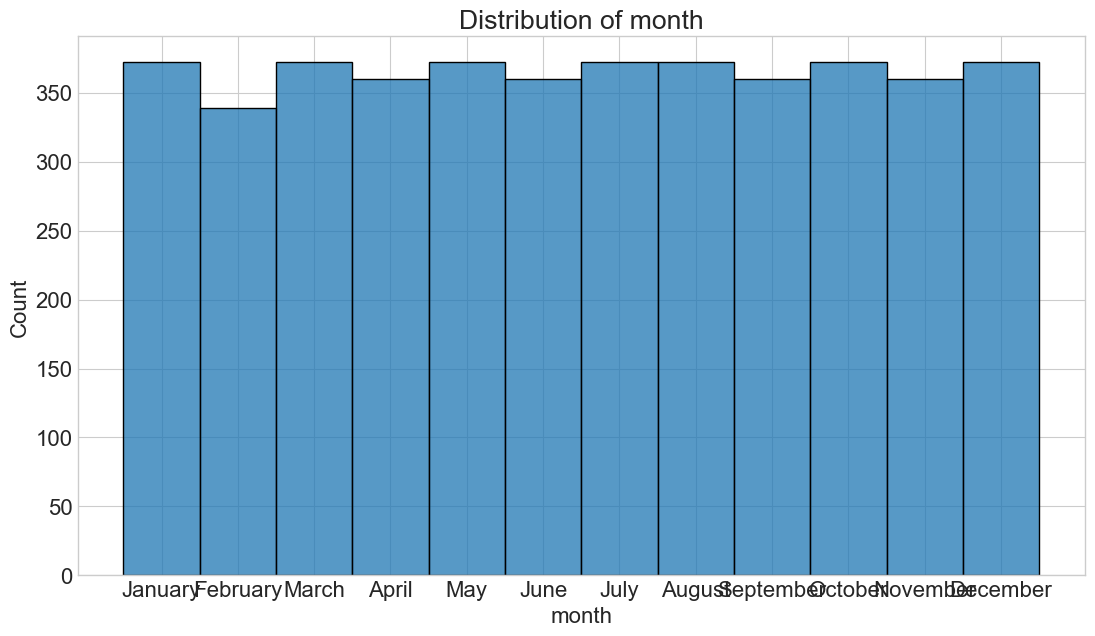

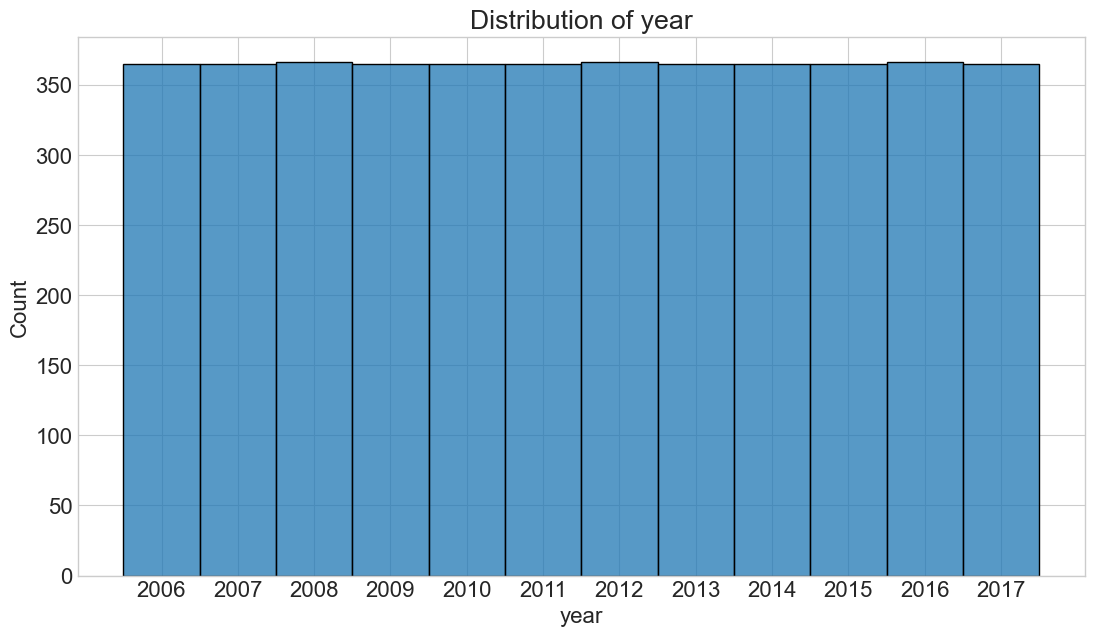

In [28]:
ac.plot_distributions(gp)